# Quickstart: Pandas API on Spark

The pandas API on Spark, accessible via pyspark.pandas, is a distributed version of the popular pandas library. It brings the ease and familiarity of pandas syntax to big data processing by leveraging Apache Spark's distributed computing capabilities. This allows users to perform data analysis on large datasets that exceed a single machine's memory.

### Key Features
* **Familiar Syntax:** Uses pandas-like syntax, making it easier for users familiar with pandas to transition to big data.
* **Scalability:** Handles large datasets by distributing computations across a Spark cluster.
* **Interoperability:** Seamlessly converts between pandas-on-Spark DataFrames and Spark DataFrames.

Convert pandas-on-Spark DataFrame to Spark DataFrame:
```python
# pandas-on-Spark DataFrame
df_pandas_on_spark = ps.read_csv('data.csv')

# Convert to Spark DataFrame
df_spark = df_pandas_on_spark.to_spark()
```

Convert Spark DataFrame to pandas-on-Spark DataFrame:
```python
# Spark DataFrame
df_spark = spark.read.csv('data.csv', header=True, inferSchema=True)

# Convert to pandas-on-Spark DataFrame
df_pandas_on_spark = ps.DataFrame(df_spark)
```

This is a short introduction to pandas API on Spark, geared mainly for new users. This notebook shows you some key differences between pandas and pandas API on Spark. This notebook comes from the documentation on pandas API on Spark' at [the quickstart page](https://spark.apache.org/docs/latest/api/python/getting_started/index.html).

Customarily, we import pandas API on Spark as follows:

### Spark DataFrame vs. Pandas API on Spark

| Feature         | **Spark DataFrame**                               | **Pandas API on Spark**                          |
| --------------- | ------------------------------------------------- | ------------------------------------------------ |
| **Design Goal** | Distributed computing at scale                    | Pandas-like syntax on Spark                      |
| **Performance** | Highly optimized via Catalyst engine              | Adds translation overhead                        |
| **Scalability** | Built for multi-node clusters                     | Scales, but less efficient for complex ops       |
| **Syntax**      | SQL-like / functional (`select`, `groupBy`, etc.) | Familiar Pandas style (`.groupby()`, `.apply()`) |
| **Best For**    | ETL, pipelines, MLlib, SQL integration            | Migrating Pandas code to large data              |
| **Drawbacks**   | Less “Pythonic” syntax                            | Not all Pandas ops are fully optimized           |


In [1]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps

#  Silence the warnings
jvm = spark._jvm
Configurator = jvm.org.apache.logging.log4j.core.config.Configurator
Level = jvm.org.apache.logging.log4j.Level
Configurator.setLevel("org.apache.spark.sql.execution.window.WindowExec", Level.ERROR)

/usr/lib/spark/python/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


## Object Creation



Creating a pandas-on-Spark Series by passing a list of values, letting pandas API on Spark create a default integer index:

In [2]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a pandas-on-Spark DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,1.126296,0.586317,-1.186033,0.922866
2013-01-02,0.445235,-0.556502,-0.719851,-0.567003
2013-01-03,2.103527,2.293205,-0.962426,-0.470440
2013-01-04,-0.616938,-0.690477,0.660036,0.330210
2013-01-05,0.216913,-0.365849,-0.691235,-1.079099
2013-01-06,0.659076,0.837174,-0.093656,0.523378


Now, this pandas DataFrame can be converted to a pandas-on-Spark DataFrame

In [10]:
psdf = ps.from_pandas(pdf)

In [11]:
type(psdf)

pyspark.pandas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame.

In [12]:
psdf

,A,B,C,D
2013-01-01,1.126296,0.586317,-1.186033,0.922866
2013-01-02,0.445235,-0.556502,-0.719851,-0.567003
2013-01-03,2.103527,2.293205,-0.962426,-0.470440
2013-01-04,-0.616938,-0.690477,0.660036,0.330210
2013-01-05,0.216913,-0.365849,-0.691235,-1.079099
2013-01-06,0.659076,0.837174,-0.093656,0.523378


Also, it is possible to create a pandas-on-Spark DataFrame from Spark DataFrame easily.

Creating a Spark DataFrame from pandas DataFrame

In [13]:
sdf = spark.createDataFrame(pdf)

In [14]:
sdf.show()

+-------------------+-------------------+--------------------+--------------------+
|                  A|                  B|                   C|                   D|
+-------------------+-------------------+--------------------+--------------------+
|  1.126295972874356| 0.5863165527336787| -1.1860325266901455|  0.9228664539234606|
| 0.4452354724652785|-0.5565016868261716| -0.7198507243080742| -0.5670034798712575|
|  2.103527377795059| 2.2932052272474714| -0.9624255418901377|-0.47044010462595204|
|-0.6169383484459268|-0.6904772569608473|  0.6600360513567949|  0.3302097445872155|
|0.21691299203650352|-0.3658494016914881| -0.6912345361949085|  -1.079099229887667|
| 0.6590758468124945| 0.8371743621334808|-0.09365560315272274|  0.5233782697400566|
+-------------------+-------------------+--------------------+--------------------+



Creating pandas-on-Spark DataFrame from Spark DataFrame.

In [15]:
psdf = sdf.pandas_api()

In [16]:
psdf

,A,B,C,D
0,1.126296,0.586317,-1.186033,0.922866
1,0.445235,-0.556502,-0.719851,-0.567003
2,2.103527,2.293205,-0.962426,-0.470440
3,-0.616938,-0.690477,0.660036,0.330210
4,0.216913,-0.365849,-0.691235,-1.079099
5,0.659076,0.837174,-0.093656,0.523378


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [17]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

Here is how to show top rows from the frame below.

Note that the data in a Spark dataframe does not preserve the natural order by default. The natural order can be preserved by setting `compute.ordered_head` option but it causes a performance overhead with sorting internally.

In [18]:
psdf.head()

,A,B,C,D
0,1.126296,0.586317,-1.186033,0.922866
1,0.445235,-0.556502,-0.719851,-0.567003
2,2.103527,2.293205,-0.962426,-0.470440
3,-0.616938,-0.690477,0.660036,0.330210
4,0.216913,-0.365849,-0.691235,-1.079099


Displaying the index, columns, and the underlying numpy data.

In [19]:
psdf.index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [20]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
psdf.to_numpy()

/usr/lib/spark/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


array([[ 1.12629597,  0.58631655, -1.18603253,  0.92286645],
       [ 0.44523547, -0.55650169, -0.71985072, -0.56700348],
       [ 2.10352738,  2.29320523, -0.96242554, -0.4704401 ],
       [-0.61693835, -0.69047726,  0.66003605,  0.33020974],
       [ 0.21691299, -0.3658494 , -0.69123454, -1.07909923],
       [ 0.65907585,  0.83717436, -0.0936556 ,  0.52337827]])

Showing a quick statistic summary of your data

In [22]:
psdf.describe()

25/10/14 00:24:27 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.655685,0.350645,-0.498860,-0.056681
std,0.913686,1.138947,0.675304,0.764543
min,-0.616938,-0.690477,-1.186033,-1.079099
25%,0.216913,-0.556502,-0.962426,-0.567003
50%,0.445235,-0.365849,-0.719851,-0.470440
75%,1.126296,0.837174,-0.093656,0.523378
max,2.103527,2.293205,0.660036,0.922866


Transposing your data

In [23]:
psdf.T

,0,1,2,3,4,5
A,1.126296,0.445235,2.103527,-0.616938,0.216913,0.659076
B,0.586317,-0.556502,2.293205,-0.690477,-0.365849,0.837174
C,-1.186033,-0.719851,-0.962426,0.660036,-0.691235,-0.093656
D,0.922866,-0.567003,-0.470440,0.330210,-1.079099,0.523378


Sorting by its index

In [24]:
psdf.sort_index(ascending=False)

,A,B,C,D
5,0.659076,0.837174,-0.093656,0.523378
4,0.216913,-0.365849,-0.691235,-1.079099
3,-0.616938,-0.690477,0.660036,0.330210
2,2.103527,2.293205,-0.962426,-0.470440
1,0.445235,-0.556502,-0.719851,-0.567003
0,1.126296,0.586317,-1.186033,0.922866


Sorting by value

In [25]:
psdf.sort_values(by='B')

,A,B,C,D
3,-0.616938,-0.690477,0.660036,0.330210
1,0.445235,-0.556502,-0.719851,-0.567003
4,0.216913,-0.365849,-0.691235,-1.079099
0,1.126296,0.586317,-1.186033,0.922866
5,0.659076,0.837174,-0.093656,0.523378
2,2.103527,2.293205,-0.962426,-0.470440


## Missing Data
Pandas API on Spark primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [26]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [27]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [28]:
psdf1 = ps.from_pandas(pdf1)

In [29]:
psdf1

,A,B,C,D,E
2013-01-01,1.126296,0.586317,-1.186033,0.922866,1.0
2013-01-02,0.445235,-0.556502,-0.719851,-0.567003,1.0
2013-01-03,2.103527,2.293205,-0.962426,-0.470440,NaN
2013-01-04,-0.616938,-0.690477,0.660036,0.330210,NaN


To drop any rows that have missing data.

In [30]:
psdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.126296,0.586317,-1.186033,0.922866,1.0
2013-01-02,0.445235,-0.556502,-0.719851,-0.567003,1.0


Filling missing data.

In [31]:
psdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.126296,0.586317,-1.186033,0.922866,1.0
2013-01-02,0.445235,-0.556502,-0.719851,-0.567003,1.0
2013-01-03,2.103527,2.293205,-0.962426,-0.470440,5.0
2013-01-04,-0.616938,-0.690477,0.660036,0.330210,5.0


## Operations

### Stats
Performing a descriptive statistic:

In [32]:
psdf.mean()

A    0.655685
B    0.350645
C   -0.498860
D   -0.056681
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in pandas API on Spark.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion.

In [33]:
prev = spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [34]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)
%timeit ps.range(300000).to_pandas()

342 ms ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()

1.13 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [37]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [38]:
psdf

,A,B,C,D
0,foo,one,1.306176,0.383981
1,bar,one,0.096565,-1.120556
2,foo,two,0.628619,0.032616
3,bar,three,0.392614,2.033072
4,foo,two,-0.508205,1.685462
5,bar,two,1.068311,-0.292794
6,foo,one,-1.292768,1.863176
7,foo,three,0.361383,0.943631


Grouping and then applying the [sum()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.sum.html) function to the resulting groups.

In [39]:
psdf.groupby('A').sum()

,C,D
A,,
bar,1.557490,0.619722
foo,0.495205,4.908866


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [40]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo two    0.120414  1.718078
bar three  0.392614  2.033072
foo one    0.013408  2.247157
    three  0.361383  0.943631
bar one    0.096565 -1.120556
    two    1.068311 -0.292794

## Plotting

In [41]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [42]:
psser = ps.Series(pser)

In [43]:
psser = psser.cumsum()

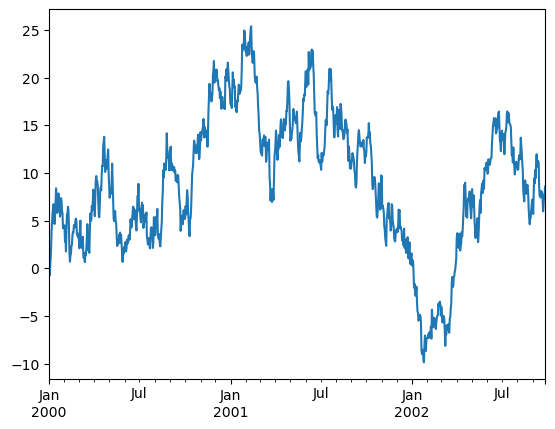

In [44]:
psser.plot(backend='matplotlib');

On a DataFrame, the [plot()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html) method is a convenience to plot all of the columns with labels:

In [45]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [46]:
psdf = ps.from_pandas(pdf)

In [47]:
psdf = psdf.cumsum()

<Axes: >

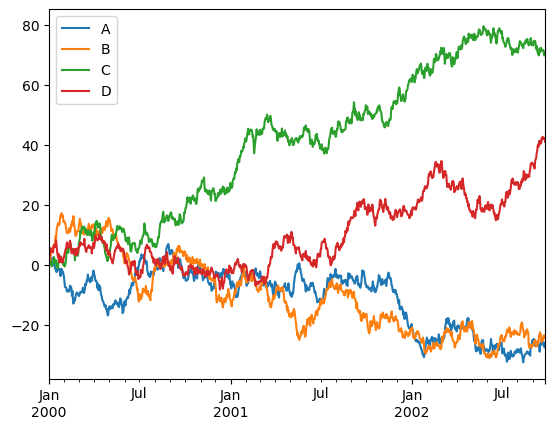

In [59]:
psdf.to_pandas().plot()

Currently, plotting directly from a Pandas on Spark DataFrame returns errors. Alternatively, we are able to convert it to Pandas DF and then plot.

For more details, [Plotting](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html#plotting) documentation.

## Getting data in/out

### CSV

CSV is straightforward and easy to use. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_csv.html) to write a CSV file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_csv.html) to read a CSV file.

In [49]:
psdf.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

,A,B,C,D
0,-0.798337,-0.844564,-0.226068,2.440018
1,0.462873,1.026278,0.247702,2.340974
2,2.371628,1.040347,0.585365,4.556450
3,1.798083,2.689121,0.794432,5.456110
4,1.712262,4.152913,0.680470,4.625970
5,0.409384,4.036123,-0.246678,4.676084
6,1.511527,5.506018,-0.533752,4.416641
7,1.874441,5.350284,1.192754,4.664549
8,2.377679,5.849315,0.816167,4.087267
9,-0.134091,6.100495,0.964252,6.122414


### Parquet

Parquet is an efficient and compact file format to read and write faster. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_parquet.html) to write a Parquet file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_parquet.html) to read a Parquet file.

In [50]:
psdf.to_parquet('bar.parquet')
ps.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,-0.798337,-0.844564,-0.226068,2.440018
1,0.462873,1.026278,0.247702,2.340974
2,2.371628,1.040347,0.585365,4.556450
3,1.798083,2.689121,0.794432,5.456110
4,1.712262,4.152913,0.680470,4.625970
5,0.409384,4.036123,-0.246678,4.676084
6,1.511527,5.506018,-0.533752,4.416641
7,1.874441,5.350284,1.192754,4.664549
8,2.377679,5.849315,0.816167,4.087267
9,-0.134091,6.100495,0.964252,6.122414


### Spark IO

In addition, pandas API on Spark fully supports Spark's various datasources such as ORC and an external datasource.  See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_orc.html) to write it to the specified datasource and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_orc.html) to read it from the datasource.

In [51]:
psdf.to_spark_io('zoo.orc', format="orc")
ps.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,-0.798337,-0.844564,-0.226068,2.440018
1,0.462873,1.026278,0.247702,2.340974
2,2.371628,1.040347,0.585365,4.556450
3,1.798083,2.689121,0.794432,5.456110
4,1.712262,4.152913,0.680470,4.625970
5,0.409384,4.036123,-0.246678,4.676084
6,1.511527,5.506018,-0.533752,4.416641
7,1.874441,5.350284,1.192754,4.664549
8,2.377679,5.849315,0.816167,4.087267
9,-0.134091,6.100495,0.964252,6.122414


See the [Input/Output](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/io.html) documentation for more details.